In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False, mean=True, ignore='', dropna=True):
    columns = [c for c in df.columns if c_filter in c]
    if ignore:
        columns = [c for c in columns if ignore not in c]
    gd = df[columns]
    gd.set_index(df['epoch'], inplace=True)

    if dropna:
        gd = gd.dropna()
    if mean:
        gd = gd.groupby('epoch').mean()
    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd.plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

In [729]:
!scp -r osnielteixeira2@200.20.15.153:~/experiments/2024-11-05-1014 ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/
metrics_path = './experiments/2024-11-05-1014/version_0/metrics.csv'
metrics = pd.read_csv(metrics_path)

epoch=19-step=19.ckpt                         100%  341KB   2.7MB/s   00:00    
hparams.yaml                                  100%  220     7.2KB/s   00:00    
metrics.csv                                   100% 1622KB  10.0MB/s   00:00    
params.pt                                     100%  495    16.4KB/s   00:00    


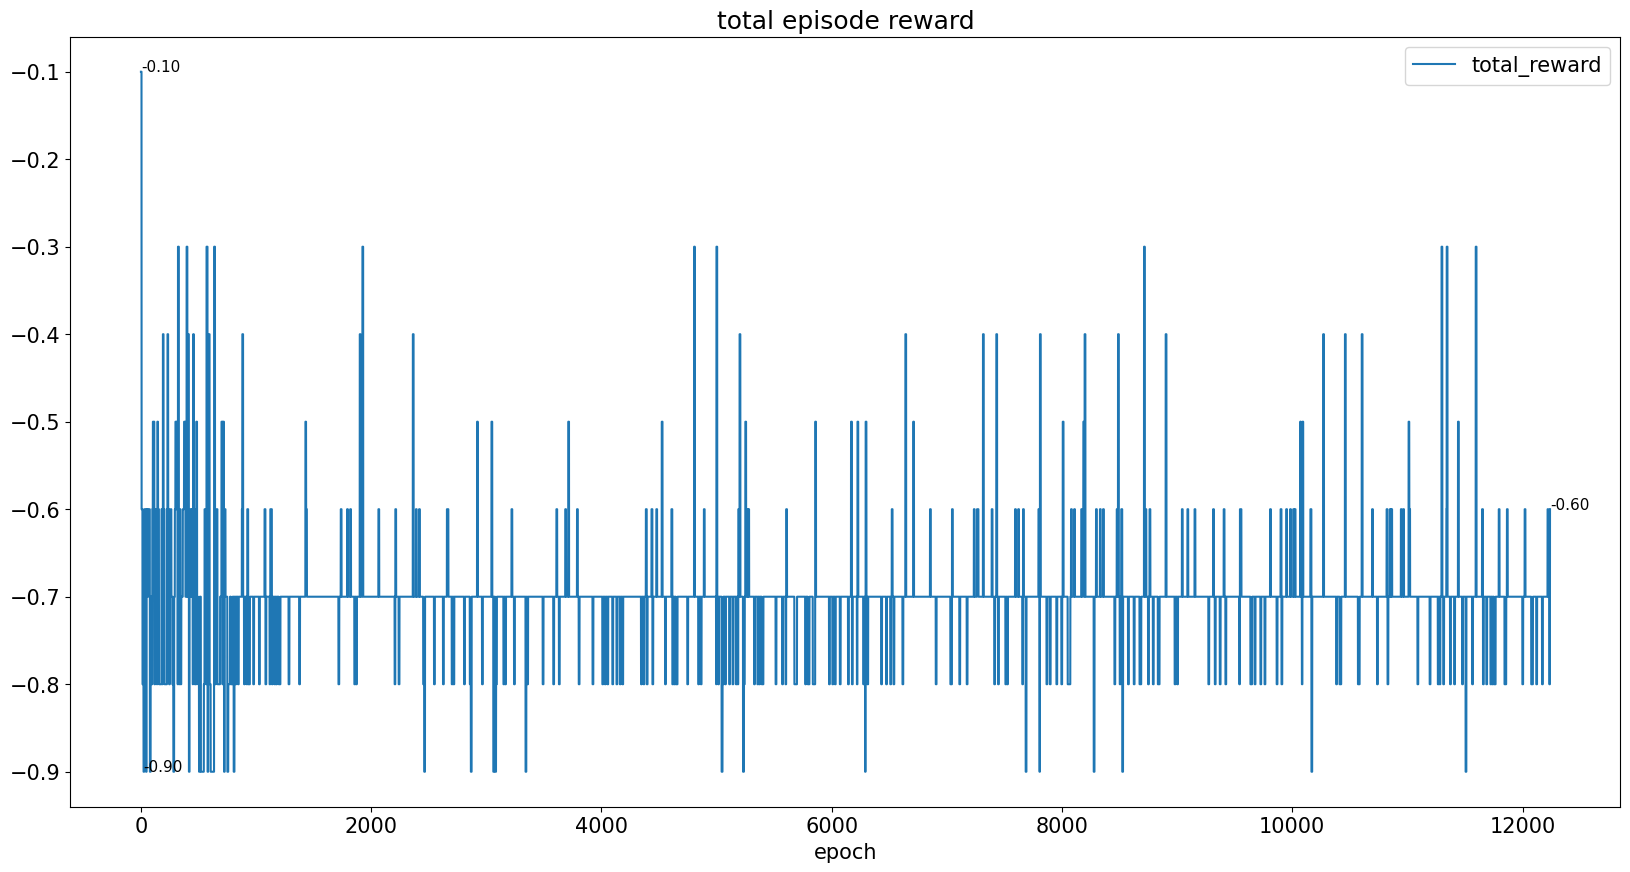

In [730]:
display(metrics, 'total', 'total episode reward', ignore='val')

In [731]:
# display(metrics, 'aon', 'All or Nothing')

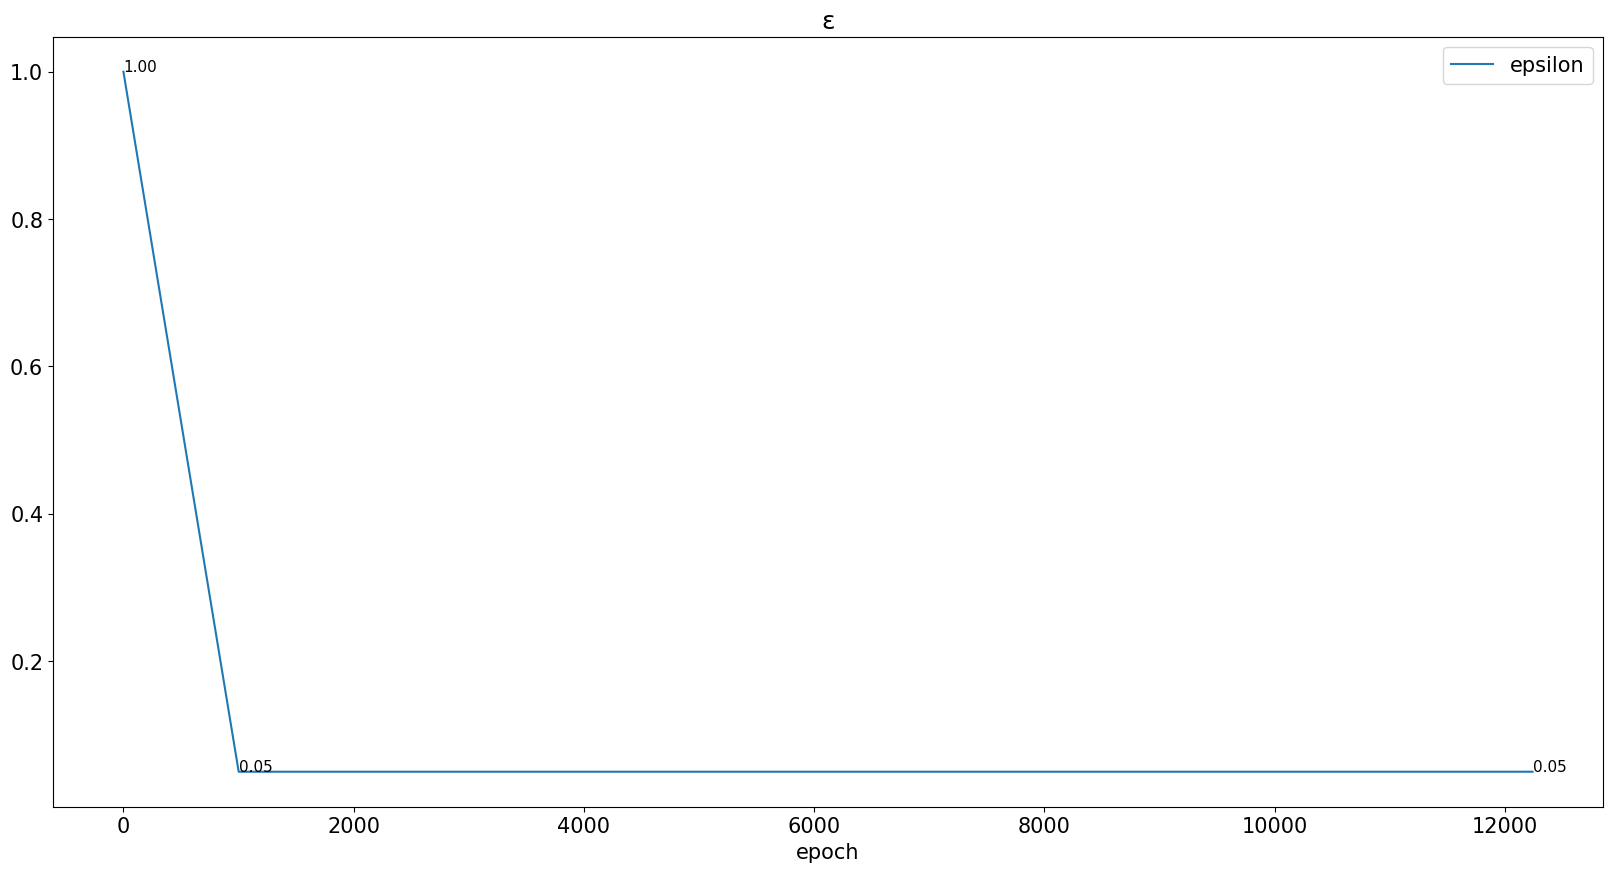

In [732]:
display(metrics, 'epsilon', 'ε')

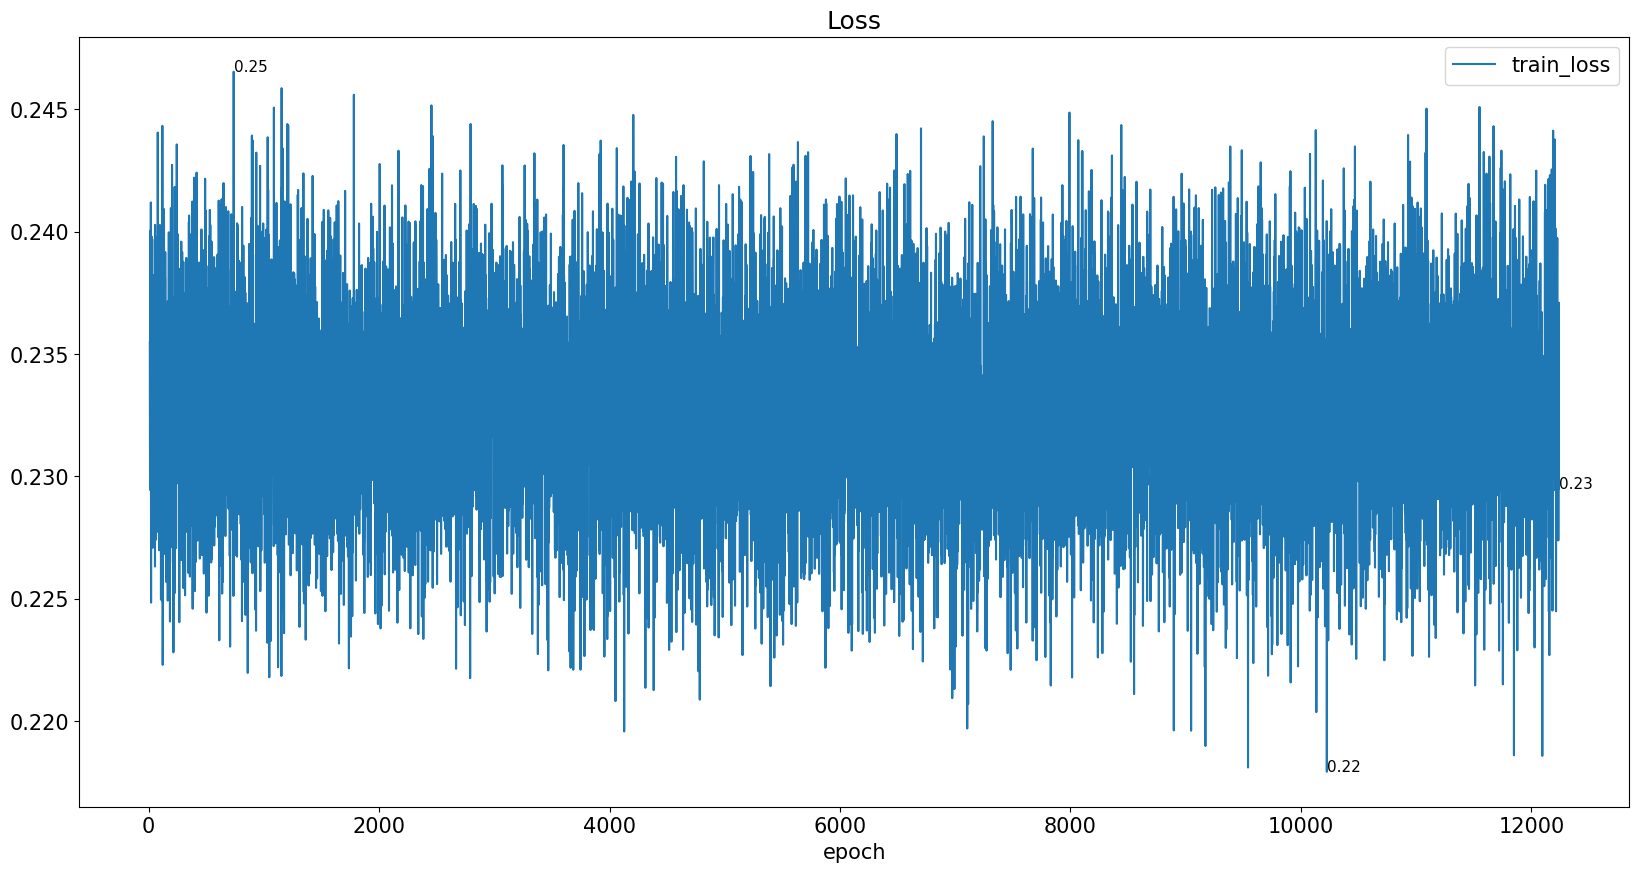

In [733]:
display(metrics[10:], 'loss', 'Loss')

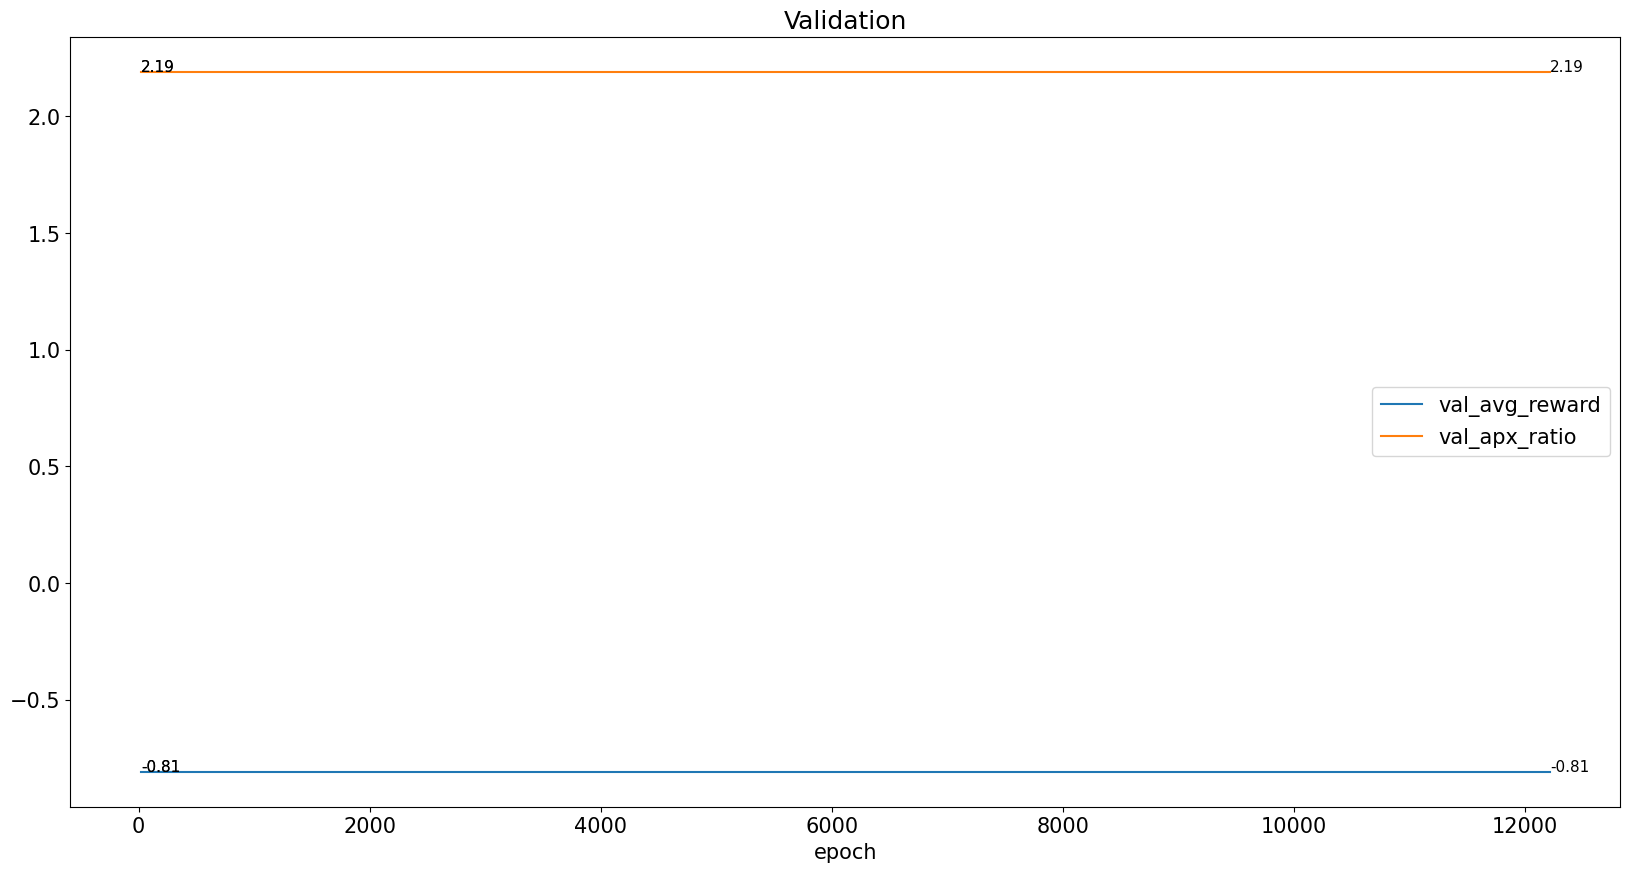

In [734]:
display(metrics, 'val', 'Validation')

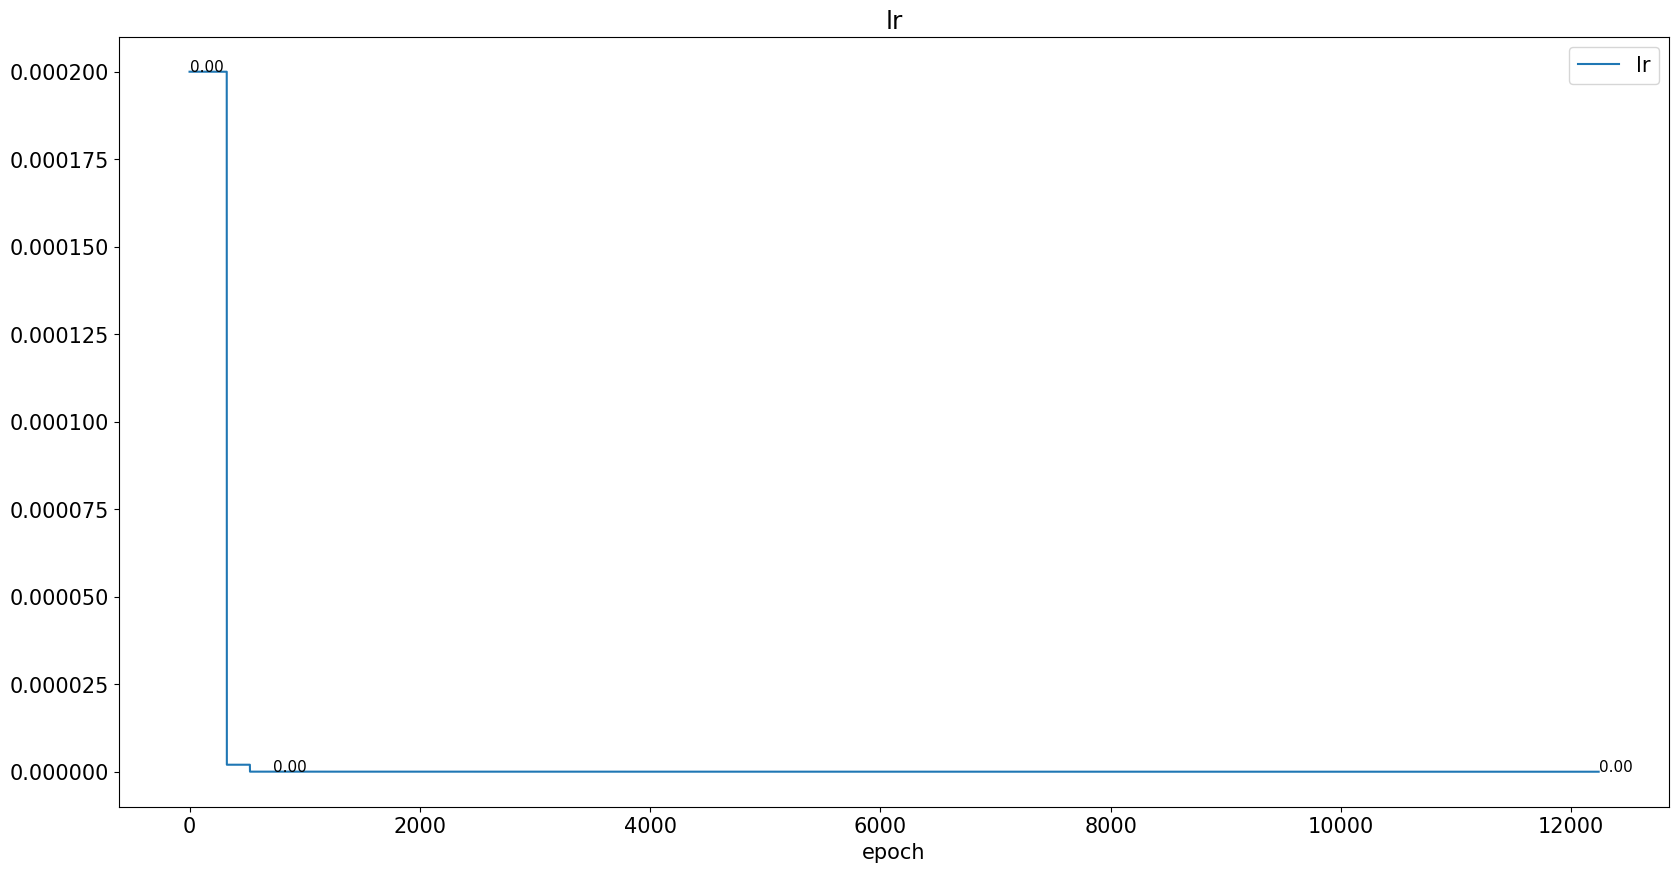

In [735]:
display(metrics, 'lr', 'lr')

In [736]:
# display(metrics, 'train', 'Normalized Train Metrics', normalize=True)

In [737]:
for ax in axes:
    plt.close(ax.get_figure())